### **EDA : Exploratary Data Analysis**
This notebook deals with EDA of Boston House Sale Price Features data set and the respective Price of each house based on those Features By performing this Data Analysis, many insights can be drawn and can also find any anamolies like outliers can be seen. Also we can see the relationship between multiple columns and target.


# New Section

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
houseprices_df = pd.read_csv('train.csv')

Finding the NaN values in the Dataset

In [81]:
houseprices_df.isnull().sum().sort_values(ascending = False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Filling the NaN Values for both Categorical and Numerical values

In [82]:
for col in houseprices_df:
    if houseprices_df[col].dtype == 'object':
      houseprices_df[col] = houseprices_df[col].fillna(houseprices_df[col].mode()[0])
    else:
       houseprices_df[col].fillna(round(houseprices_df[col].mean()),inplace = True)


## Basic Statistical Data Analysis##

In [83]:
houseprices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.686986,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.533562,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569114,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994850,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Basic Data Manupulation by removing redundant data columns like removing floor wise area and retaining te total area of the house

In [84]:
houseprices_df['TotalDecArea'] =  houseprices_df['WoodDeckSF']+houseprices_df['OpenPorchSF']+houseprices_df['EnclosedPorch']+houseprices_df['3SsnPorch']+houseprices_df['PoolArea']+houseprices_df['ScreenPorch']
houseprices_df.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','ScreenPorch'], inplace= True)

In [85]:
houseprices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalDecArea
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,61
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,298
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,42
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,307
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000,40
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000,349
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500,60
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125,478


In [86]:
houseprices_df['TotFullBaths'] = houseprices_df['BsmtFullBath']+houseprices_df['FullBath']
houseprices_df['TothalfBath'] = houseprices_df['BsmtHalfBath'] +houseprices_df['HalfBath']
houseprices_df.drop(columns=['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'], inplace= True)

In [87]:
houseprices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalDecArea,TotFullBaths,TothalfBath
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,61,3,1
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,298,2,1
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,42,3,1
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,307,2,0
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,276,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000,40,2,1
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000,349,3,0
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500,60,2,0
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125,478,2,0


In [88]:
houseprices_df.drop(columns=['1stFlrSF','2ndFlrSF','LowQualFinSF','Id'], inplace=True)

#Visual description of numerical data with Target data

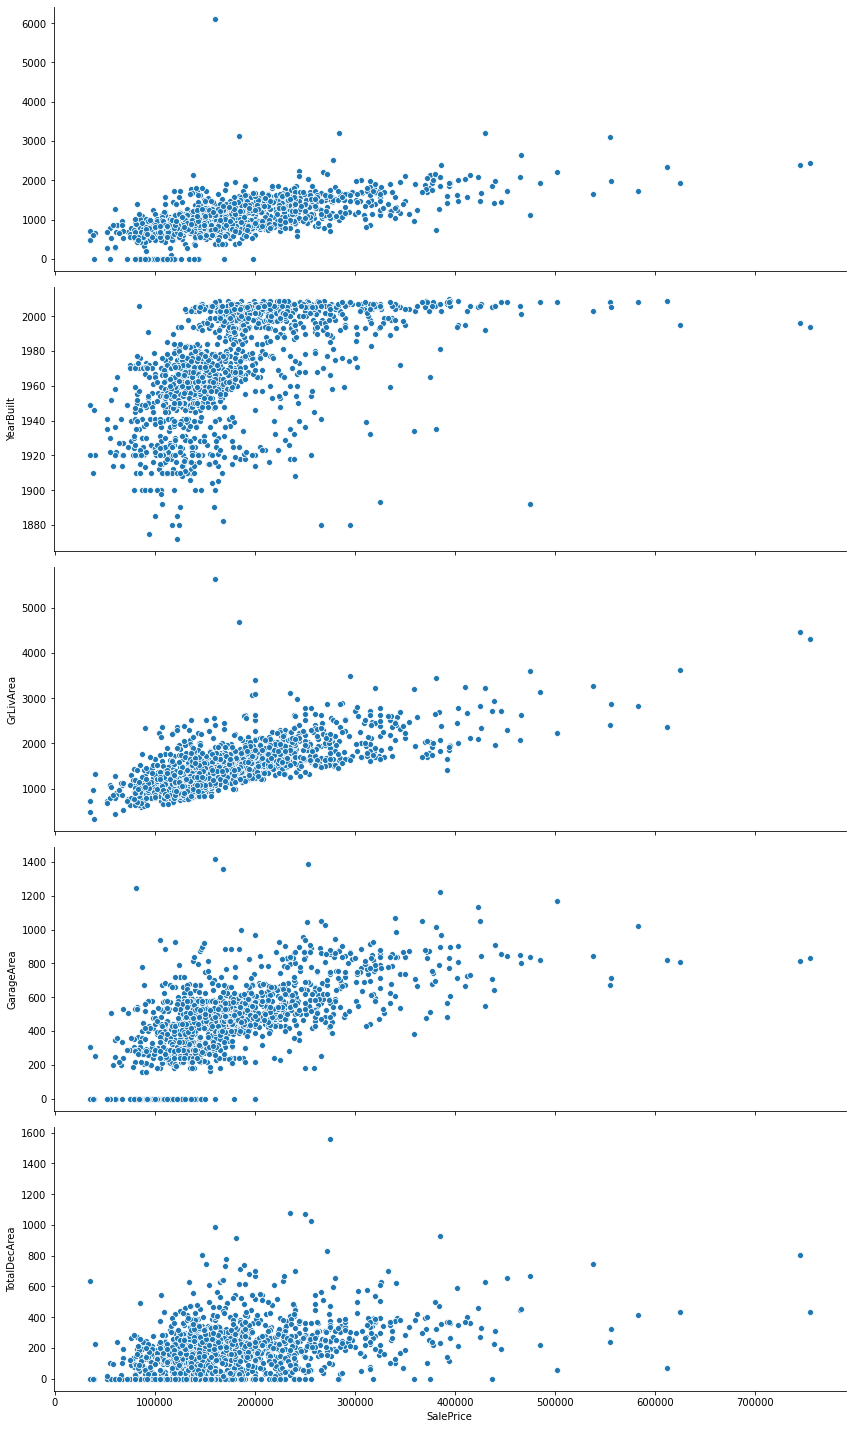

In [113]:
import seaborn as sns
pl = sns.pairplot(houseprices_df, x_vars=["SalePrice"],
                 y_vars=[ "TotalBsmtSF", 'YearBuilt','GrLivArea','GarageArea','TotalDecArea'], 
             corner = True, )
pl.fig.set_size_inches(15,20)

The above pair plots of columns shows the relation with the target. Also it shows the outliers of eac data column

***Regression Plots***: 
Regression plots and their correlation between the feautures and Target values. 
Correlations can be seen as either positive or negative correlations. 
Below Plots all show the positive Correlation with the saleprice of the house

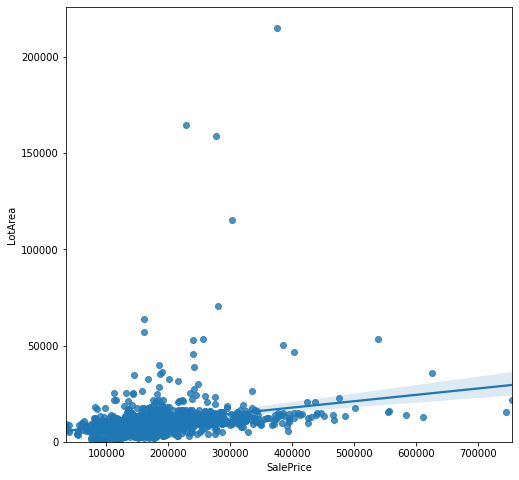

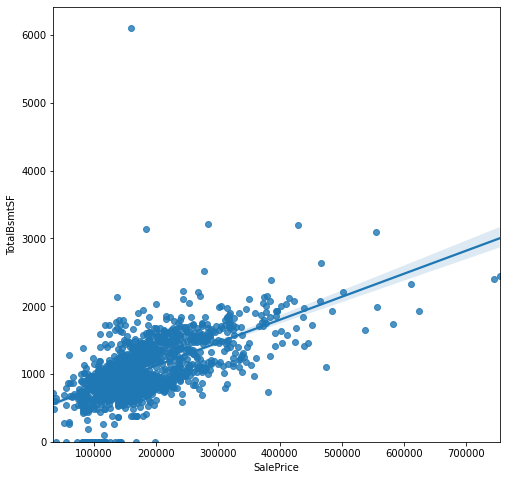

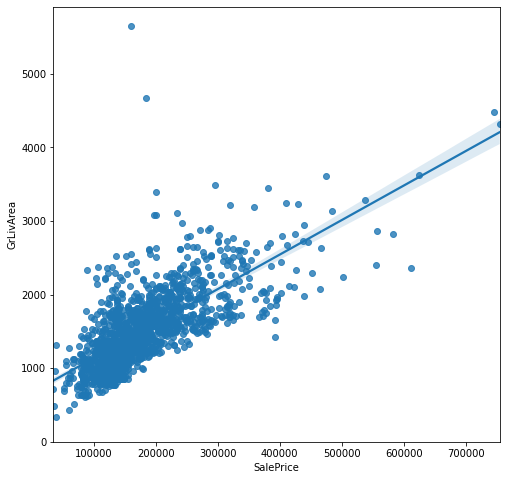

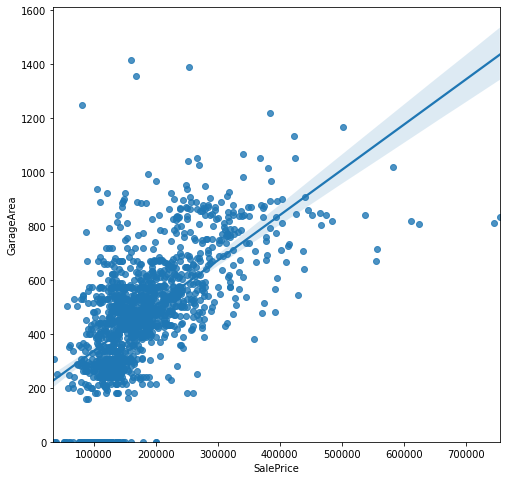

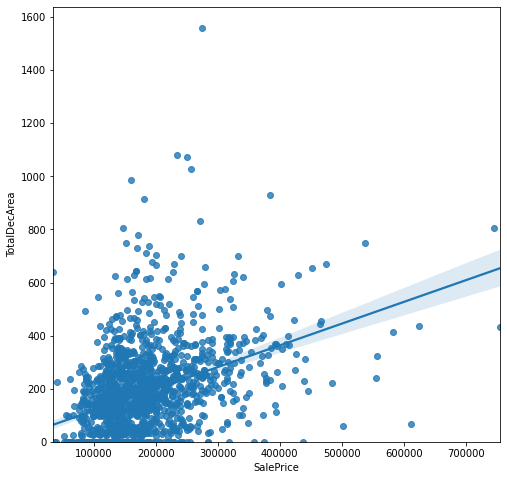

In [92]:
regplots = ['LotArea','TotalBsmtSF','GrLivArea','GarageArea','TotalDecArea']
for area in regplots:
  plt.figure(figsize=(8,8))
  sns.regplot(y =houseprices_df[area] ,x= houseprices_df['SalePrice'], data = houseprices_df)
  plt.ylim(0,)

**Box Plots:**
1. Box Plots to visulaize the categorical values against the SalePrice
2. Outliers can be seen away from the boxplots 

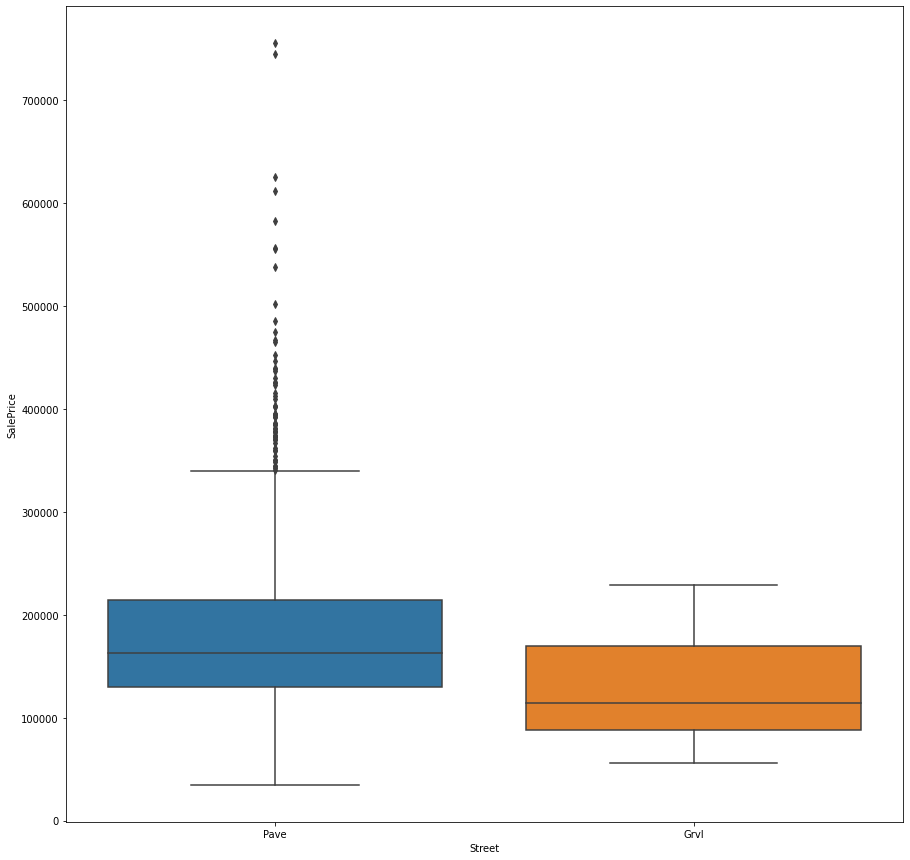

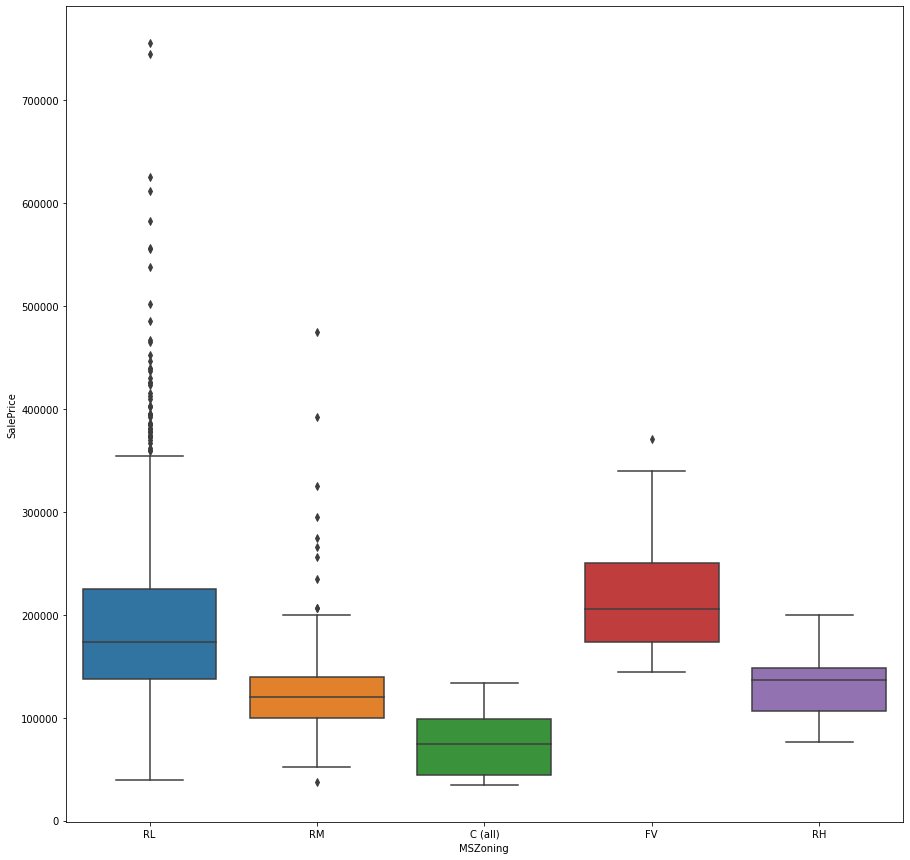

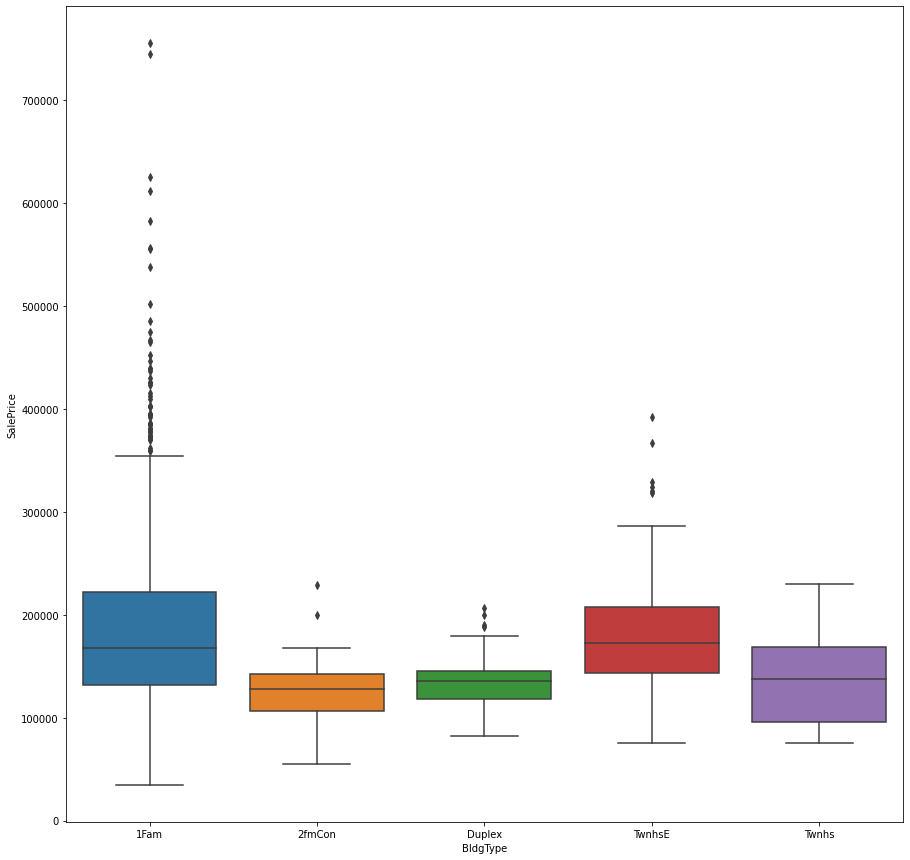

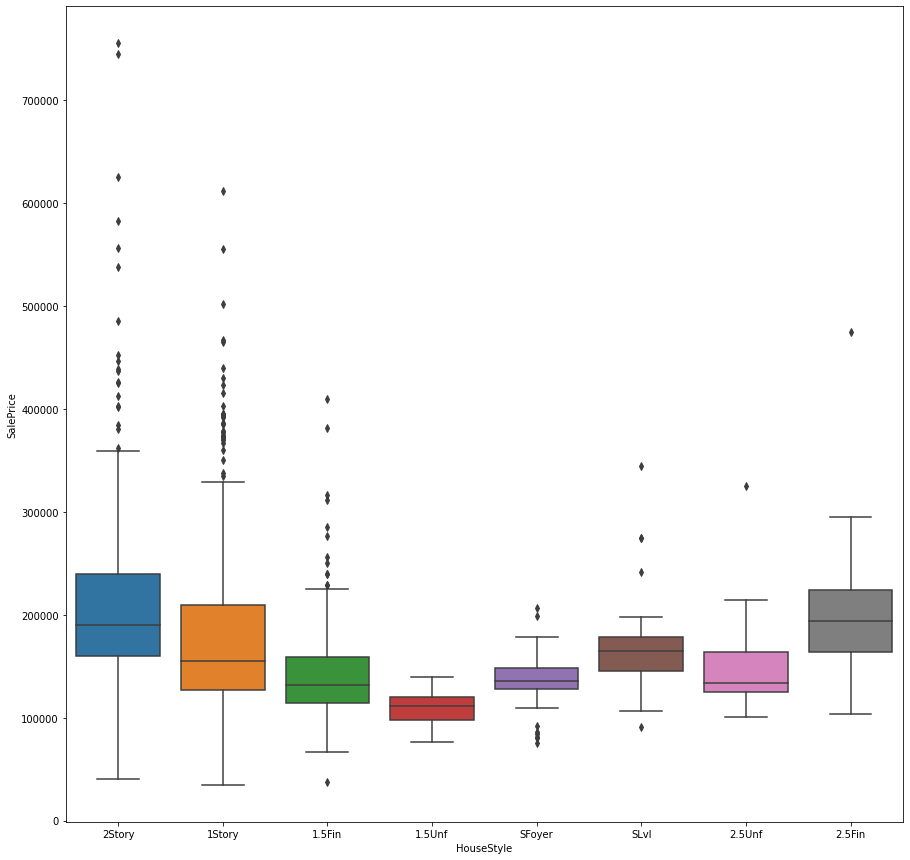

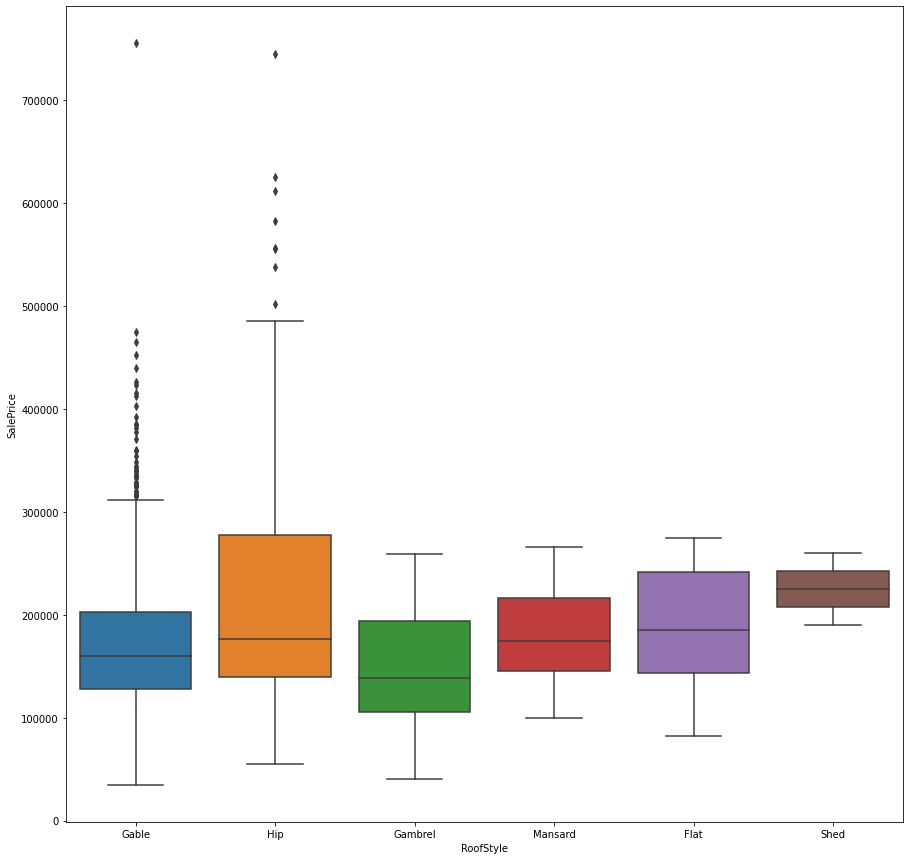

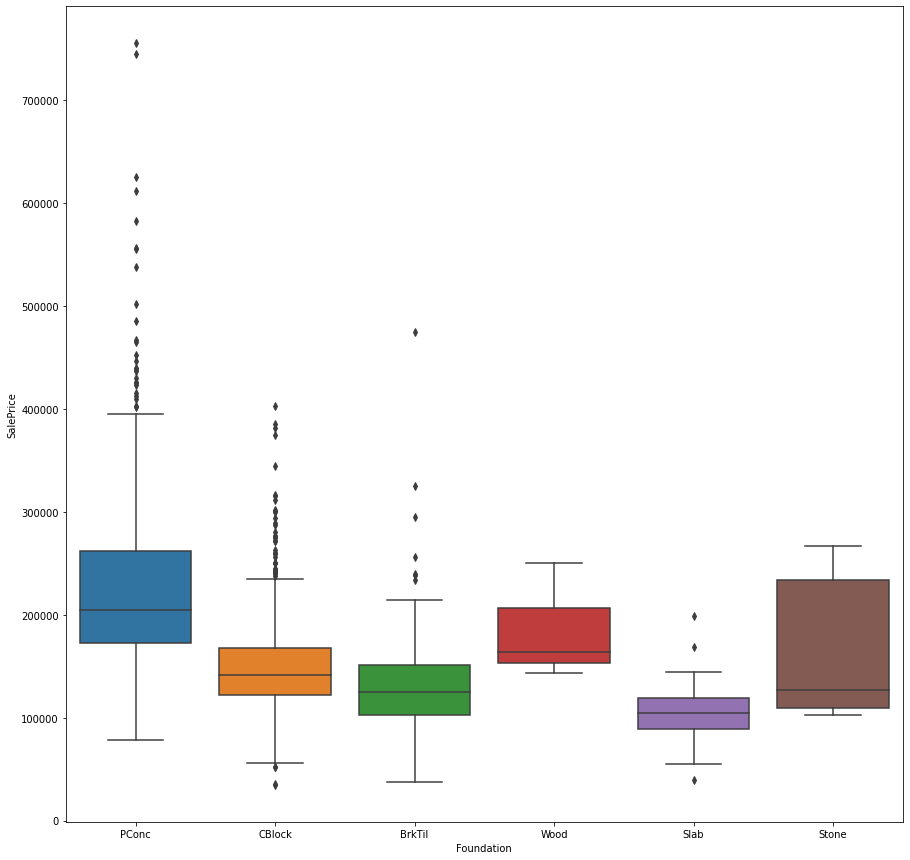

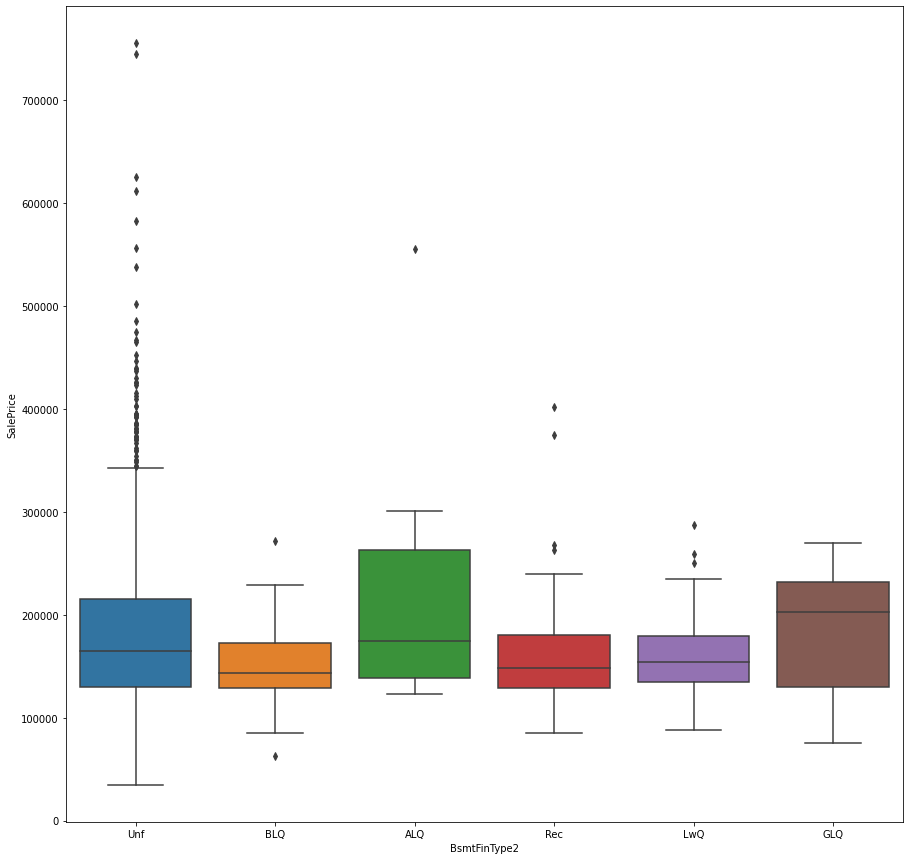

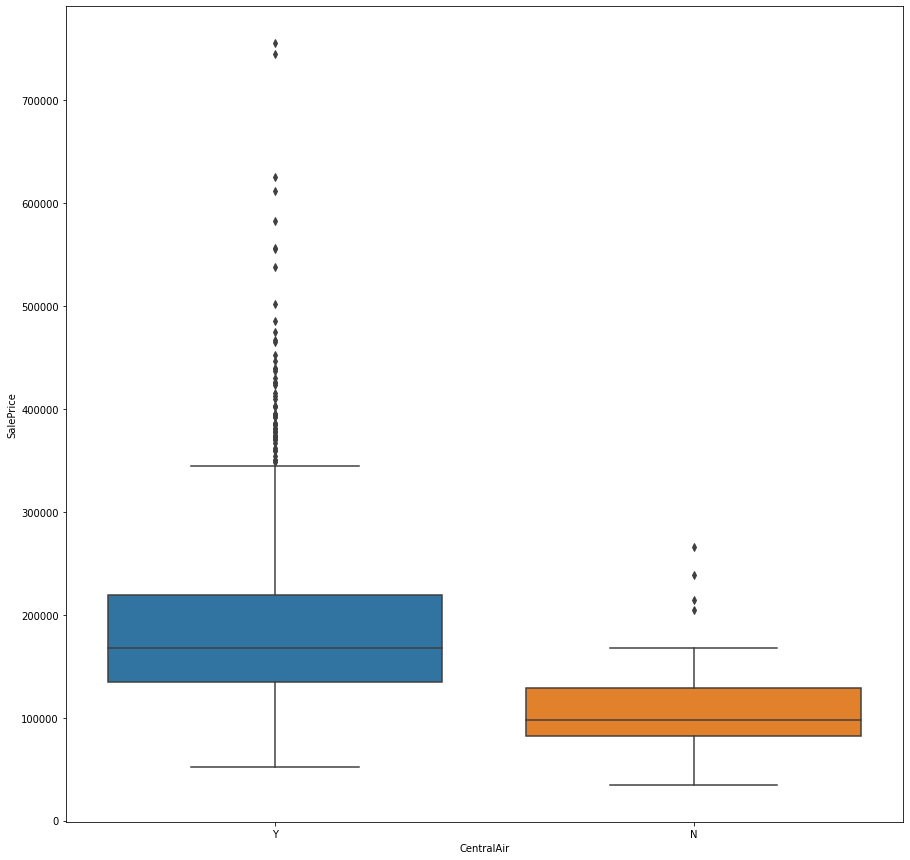

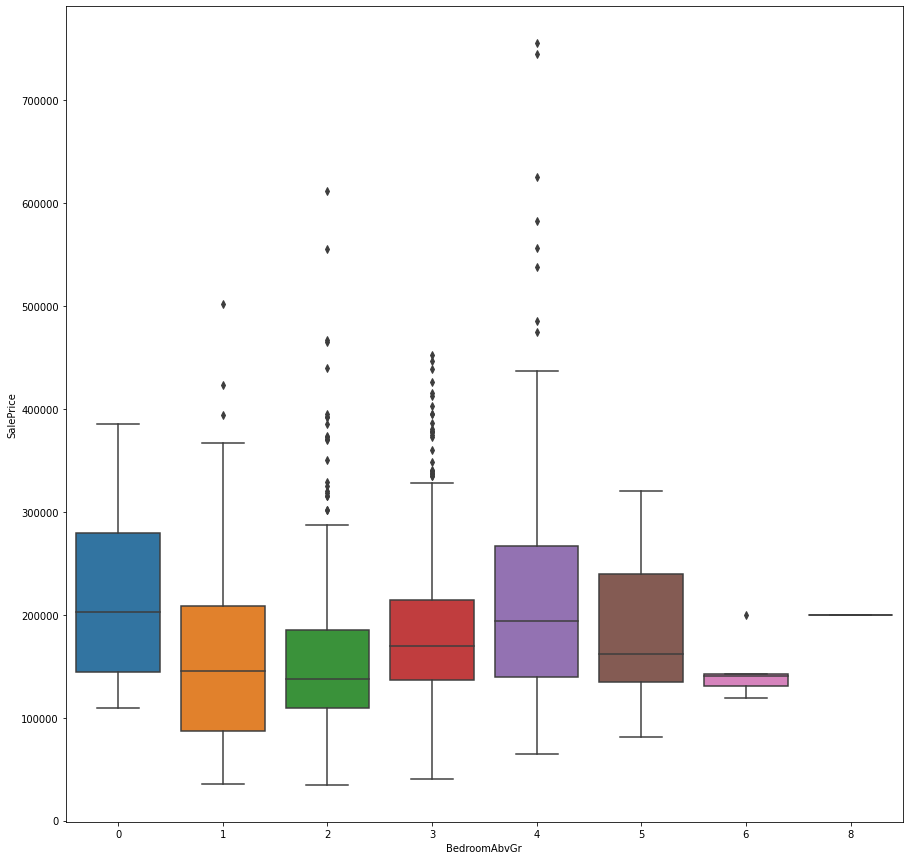

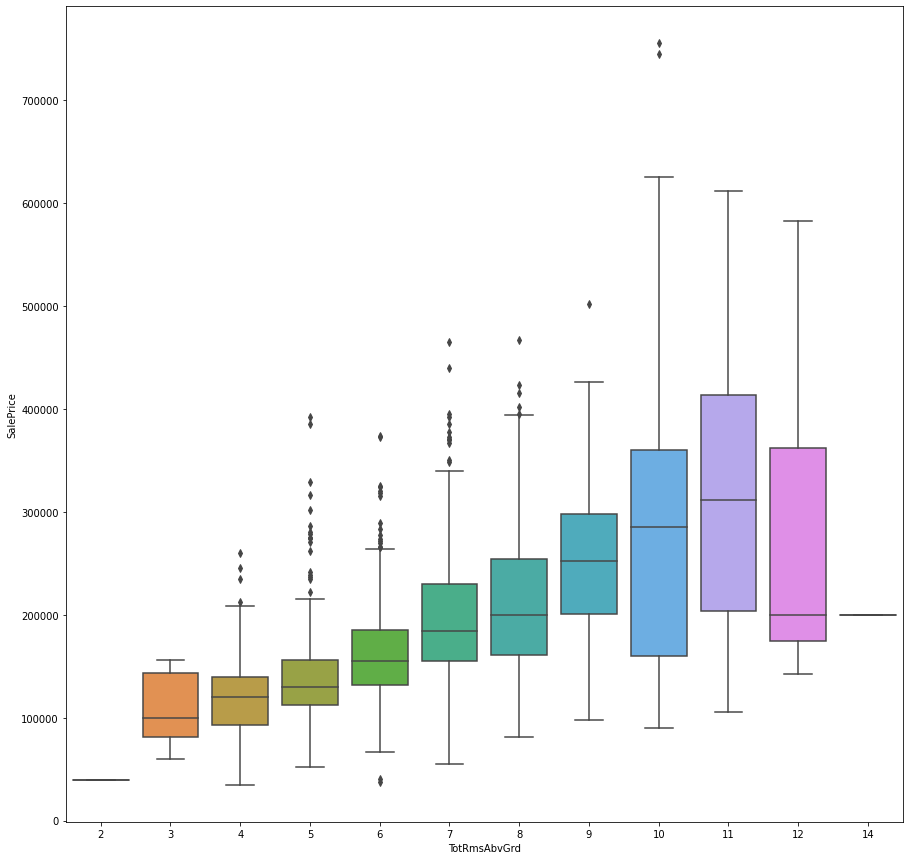

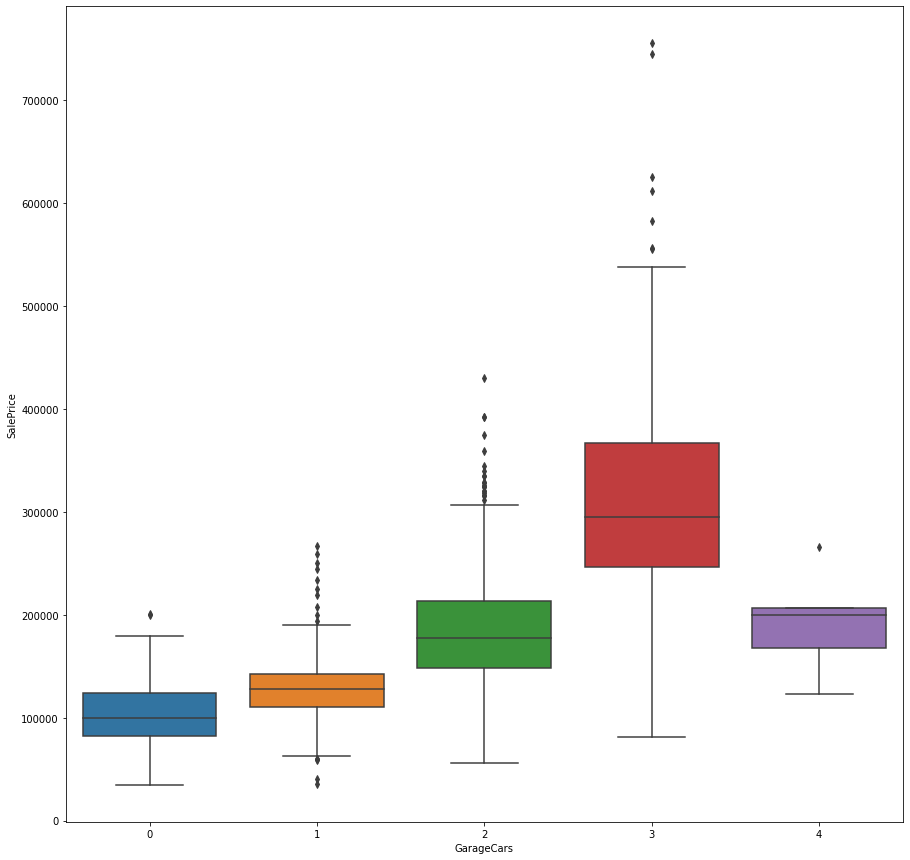

In [93]:
boxplots = ['Street','MSZoning','BldgType','HouseStyle','RoofStyle','Foundation','BsmtFinType2','CentralAir','BedroomAbvGr','TotRmsAbvGrd','GarageCars']

for box in boxplots:
  plt.figure(figsize=(15,15))
  sns.boxplot(x = houseprices_df[box], y = houseprices_df['SalePrice'])




In [94]:
Garage_Count = houseprices_df['GarageCars'].value_counts().to_frame()
Garage_Count.rename(columns={'GarageCars': 'value_counts'}, inplace=True)
Garage_Count.index.name = 'No_of_cars_Garage'
Garage_Count

,value_counts
No_of_cars_Garage,
2,824
1,369
3,181
0,81
4,5


In [95]:
Bedrooms_Count = houseprices_df['BedroomAbvGr'].value_counts().to_frame()
Bedrooms_Count.rename(columns={'BedroomAbvGr':'value_counts'}, inplace=True)
Bedrooms_Count.index.name = 'No_of_Bedrooms'
Bedrooms_Count

,value_counts
No_of_Bedrooms,
3,804
2,358
4,213
1,50
5,21
6,7
0,6
8,1


### Grouping
Grouping can be applied to Categorical Values only.

1. To know the Average price of all house styles with capacity of Garage 

In [96]:
df_group_one =  houseprices_df[['HouseStyle', 'GarageCars', 'SalePrice']]
df_group_one = df_group_one.groupby(['HouseStyle', 'GarageCars'],as_index=False).mean()
df_group_one

,HouseStyle,GarageCars,SalePrice
0,1.5Fin,0,102106.250000
1,1.5Fin,1,128245.903614
2,1.5Fin,2,169659.360000
3,1.5Fin,3,255780.000000
4,1.5Unf,0,99900.000000
5,1.5Unf,1,117816.666667
6,1.5Unf,2,107100.000000
7,1Story,0,97603.750000
8,1Story,1,124045.193717
9,1Story,2,179940.608040


In [97]:
df_group_one.max()

HouseStyle      SLvl
GarageCars         4
SalePrice     385000
dtype: object

In [98]:
df_group_one.min()

HouseStyle    1.5Fin
GarageCars         0
SalePrice      96500
dtype: object

#ANOVA
ANOVA: Analysis of Variance The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

The below frame shows the number of houses with total number of bedrooms above ground

In [99]:
houseprices_df['BedroomAbvGr'].value_counts().to_frame()

,BedroomAbvGr
3,804
2,358
4,213
1,50
5,21
6,7
0,6
8,1


In [100]:
grouped_test2=houseprices_df[['BldgType', 'SalePrice']].groupby(['BldgType'])
grouped_test2.head(1)

,BldgType,SalePrice
0,1Fam,208500
9,2fmCon,118000
17,Duplex,90000
23,TwnhsE,129900
56,Twnhs,172500


Prices of All Duplex houses 

In [101]:
grouped_test2.get_group('Duplex')['SalePrice']

17       90000
39       82000
52      110000
78      136500
102     118964
137     171000
144     125000
188     153337
330     119000
342      87500
420     206300
441     118000
454     188000
505     124500
569     135960
570     142600
582     118500
634     144000
728     110000
736      93500
738     179000
778     144000
779     135000
843     141000
886     145000
894     118858
897     142953
910     154300
913     145000
921     145900
940     150900
942     150000
943     143000
954     127500
955     145000
984     126000
1003    136905
1011    100000
1090     92900
1129    140000
1163    108959
1216    112000
1230    190000
1231    132500
1232    101800
1275    137000
1283    139000
1336    135000
1350    200000
1391    124000
1412     90000
1450    136000
Name: SalePrice, dtype: int64

The high f-test score and low P-value shows the high level of correlation between Building Type and Sale Price

In [102]:
from scipy import stats
f_val, p_val = stats.f_oneway(grouped_test2.get_group('1Fam')['SalePrice'], 
                              grouped_test2.get_group('2fmCon')['SalePrice'],
                              grouped_test2.get_group('Duplex')['SalePrice'],
                              grouped_test2.get_group('TwnhsE')['SalePrice'])  
 
print( "ANOVA results: %2.2f"% f_val, ", P =% 5.2f" %(p_val))

ANOVA results: 12.19 , P = 0.00


#Pearson Correaltion
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.
P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

1. p-value is < 0.001: we say there is strong evidence that the correlation is significant.
2. the p-value is < 0.05: there is moderate evidence that the correlation is significant.
3. the p-value is < 0.1: there is weak evidence that the correlation is significant.
4. the p-value is > 0.1: there is no evidence that the correlation is significant.


In [103]:
pearson_coef, p_value = stats.pearsonr(houseprices_df['GrLivArea'], houseprices_df['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7086244776126522  with a P-value of P = 4.518033646779431e-223


In [ ]:
ls = []
for col in houseprices_df :
  if houseprices_df[col].dtype == 'int' or houseprices_df[col].dtype == 'float':
    ls.append(col) 
ls

In [107]:
for col in ls:
  pearson_coef, p_value = stats.pearsonr(houseprices_df[col], houseprices_df['SalePrice'])
  print("The Pearson Correlation Coefficient of:", col, "is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient of: MSSubClass is -0.08428413512659517  with a P-value of P = 0.0012664716847503312
The Pearson Correlation Coefficient of: LotFrontage is 0.3348971832698148  with a P-value of P = 1.3493846699994557e-39
The Pearson Correlation Coefficient of: LotArea is 0.26384335387140573  with a P-value of P = 1.123139154919434e-24
The Pearson Correlation Coefficient of: OverallQual is 0.790981600583805  with a P-value of P = 2.185675268e-313
The Pearson Correlation Coefficient of: OverallCond is -0.07785589404867801  with a P-value of P = 0.0029123512679174826
The Pearson Correlation Coefficient of: YearBuilt is 0.5228973328794969  with a P-value of P = 2.9902290990158995e-103
The Pearson Correlation Coefficient of: YearRemodAdd is 0.5071009671113861  with a P-value of P = 3.1649482419207935e-96
The Pearson Correlation Coefficient of: MasVnrArea is 0.47524799741497087  with a P-value of P = 3.901259055486055e-83
The Pearson Correlation Coefficient of: BsmtFinSF1 

#Correlation and Heat Maps

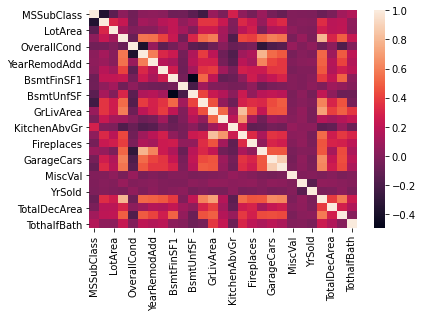

In [110]:
corr = houseprices_df.corr()
sns.heatmap(corr)

In [111]:
import heapq

print('Absolute overall correlations')
print('-' * 30)
correlations_abs_sum = corr[corr.columns].abs().sum()
print(correlations_abs_sum, '\n')

print('Weakest correlations')
print('-' * 30)
print(correlations_abs_sum.nsmallest(3))

Absolute overall correlations
------------------------------
MSSubClass       3.299409
LotFrontage      5.677390
LotArea          4.252138
OverallQual      9.473309
OverallCond      3.502471
YearBuilt        7.703282
YearRemodAdd     6.714763
MasVnrArea       6.330332
BsmtFinSF1       6.044019
BsmtFinSF2       2.384855
BsmtUnfSF        5.110351
TotalBsmtSF      8.560265
GrLivArea        9.300066
BedroomAbvGr     4.530654
KitchenAbvGr     3.572036
TotRmsAbvGrd     7.713290
Fireplaces       6.126359
GarageYrBlt      7.107274
GarageCars       8.742005
GarageArea       8.621771
MiscVal          1.545115
MoSold           1.765433
YrSold           1.762816
SalePrice       10.349732
TotalDecArea     5.505197
TotFullBaths     8.129922
TothalfBath      4.281990
dtype: float64 

Weakest correlations
------------------------------
MiscVal    1.545115
YrSold     1.762816
MoSold     1.765433
dtype: float64
